# STAT576 Homework #2

• Load data “mnist_hw.csv”.

• Make a “target” column as a target

In [18]:
import pandas as pd
import numpy as np
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding, TSNE
import matplotlib.pyplot as plt
from adjustText import adjust_text  # Import the adjustText package

In [19]:
# loading data
data = pd.read_csv("C:\\Users\\ntlmp\\Desktop\\STAT576 Data Informatics\\Datasets\\mnist_hw.csv", delimiter=",")

# setting target as target variable
y_data = data.iloc[:, -1]  # Target variable (last column)
X_data = data.iloc[:, :-1]  # Features (all columns except the last)
print(y_data.dtype) # y is numeric so no need for LabelEncoder()

int64


In [20]:
data.shape

(1797, 65)

## Problem 1: Feature Extraction by MDS
- Select 2 features with MDS and draw the scatter plot

In [10]:
# Perform MDS to reduce to 2 components
mds = MDS(n_components=2, random_state=42)
mds_result = mds.fit_transform(X_data)

C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


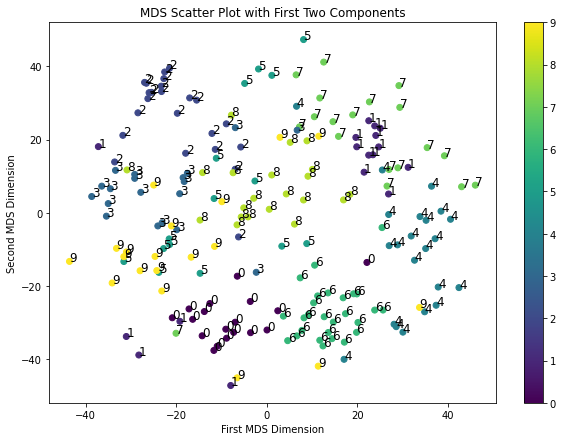

In [31]:
# choose the samples from the MDS result
X_sample_mds = np.random.choice(len(mds_result), size=200, replace=False)
mds_sample_result = mds_result[X_sample_mds]
y_sample_mds = y_data.iloc[X_sample_mds]

# Create an MDS scatter plot
plt.figure(figsize=(10, 7))
scatter_mds = plt.scatter(mds_sample_result[:, 0], mds_sample_result[:, 1], c=y_sample_mds, cmap='viridis')
plt.title('MDS Scatter Plot with First Two Components')
plt.xlabel('First MDS Dimension')
plt.ylabel('Second MDS Dimension')

# Adding labels for MDS plot
for i, label in enumerate(y_sample_mds):
    plt.text(mds_sample_result[i, 0], mds_sample_result[i, 1], str(label), fontsize=12)

plt.colorbar(scatter_mds)
plt.show()

## Problem 2: Feature Extraction IsoMAP
Select 2 features with IsoMAP and draw the scatter plot

In [35]:
isomap_result = Isomap(n_neighbors=10,n_components=2).fit_transform(X_data)

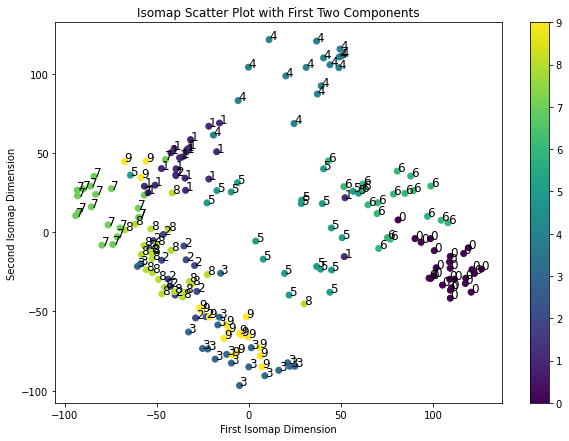

In [37]:
# choose the samples from the MDS result
X_sample_isomap = np.random.choice(len(isomap_result), size=200, replace=False)
isomap_sample_result = isomap_result[X_sample_isomap]
y_sample_isomap = y_data.iloc[X_sample_isomap]

# Create an Isomap scatter plot
plt.figure(figsize=(10, 7))
scatter_isomap = plt.scatter(isomap_sample_result[:, 0], isomap_sample_result[:, 1], c=y_sample_isomap, cmap='viridis')
plt.title('Isomap Scatter Plot with First Two Components')
plt.xlabel('First Isomap Dimension')
plt.ylabel('Second Isomap Dimension')

# Adding labels for Isomap plot
for i, label in enumerate(y_sample_isomap):
    plt.text(isomap_sample_result[i, 0], isomap_sample_result[i, 1], str(label), fontsize=12)

plt.colorbar(scatter_isomap)
plt.show()

## Problem 3: Feature Extraction by LLE
Select 2 features with LLE and draw the scatter plot

In [29]:
lle_result = LocallyLinearEmbedding(n_neighbors=12, n_components=2).fit_transform(X_data)

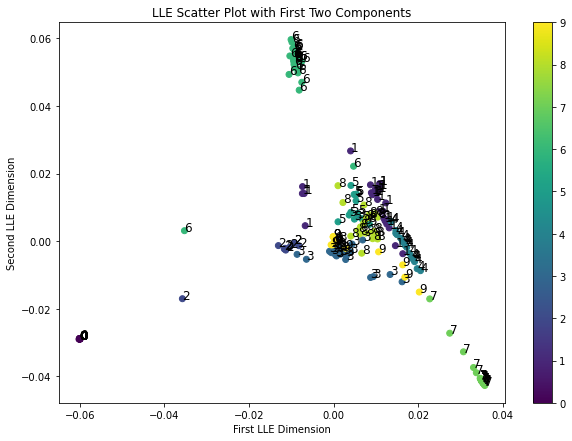

In [30]:
# choose the samples from the LLE result
X_sample_lle = np.random.choice(len(lle_result), size=200, replace=False)
lle_sample_result = lle_result[X_sample_lle]
y_sample_lle = y_data.iloc[X_sample_lle]

# Create an Locally Linear Embedding scatter plot
plt.figure(figsize=(10, 7))
scatter_lle = plt.scatter(lle_sample_result[:, 0], lle_sample_result[:, 1], c=y_sample_lle, cmap='viridis')
plt.title('LLE Scatter Plot with First Two Components')
plt.xlabel('First LLE Dimension')
plt.ylabel('Second LLE Dimension')

# Adding labels for LLE plot
for i, label in enumerate(y_sample_lle):
    plt.text(lle_sample_result[i, 0], lle_sample_result[i, 1], str(label), fontsize=12)

plt.colorbar(scatter_lle)
plt.show()

## Problem 4: Feature Extraction by t-SNE
Select 2 features with t-SNE and draw the scatter plot

In [38]:
tsne_result = TSNE(n_components=2, perplexity=3, random_state=42).fit_transform(X_data)

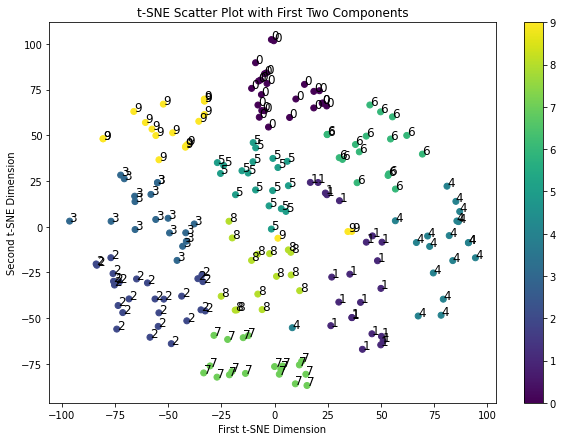

In [34]:
# choose the samples from the LLE result
X_sample_tsne = np.random.choice(len(tsne_result), size=200, replace=False)
tsne_sample_result = tsne_result[X_sample_tsne]
y_sample_tsne = y_data.iloc[X_sample_tsne]

# Create an t-SNE scatter plot
plt.figure(figsize=(10, 7))
scatter_tsne = plt.scatter(tsne_sample_result[:, 0], tsne_sample_result[:, 1], c=y_sample_tsne, cmap='viridis')
plt.title('t-SNE Scatter Plot with First Two Components')
plt.xlabel('First t-SNE Dimension')
plt.ylabel('Second t-SNE Dimension')

# Adding labels for t-SNE plot
for i, label in enumerate(y_sample_tsne):
    plt.text(tsne_sample_result[i, 0], tsne_sample_result[i, 1], str(label), fontsize=12)

plt.colorbar(scatter_tsne)
plt.show()

# Problem 5: Post-Analysis 
For each label (0-9), which label is close (or mixed)? Which label is far? Why? Do you have some idea to explain this result?

### Label 0
- **Isomap**
    - Close: Label 0 is close with Label 6. This could be due to the circular shape found in 0 and in 6. Since their shapes could be similar, their geodesic distances may not significantly differ in the underlying manifold.
    - Far: Label 0 is far from Label 7. This could be due to the angular and straight shape of Label 7, which could cause a larger difference in geodesic distance between the labels.

- **LLE**
    - Close: Label 0 is the closest to Labels 2, but it is well separated from other labels. The shape of 0 likely forms a local structure more similar to 2, possibly due to its circular shape.
    - Far: Label 0 is the farthest from Label 7. This could possibly be due to how LLE finds a difference in local structure because of how 0 is a closed shape while 7 is a sharp open shape.

- **t-SNE**
    - Close: Label 0 is close to Labels 6 and 9. Label 0 has a higher probability of choosing Labels 6 or 9 as its neighbor possibly due to their round shapes.
    - Far: Label 0 is far from 7 because the probability of Label 0 choosing Label 7 as its neighbor is lower, possibly due to 7's open and linear shape.

### Label 1
- **Isomap**
    - Close: Label 1 is close with 7, 9, 4 and 5. This could be due to the linear shape found in 7, 9, 4, and 5. Since their shapes could be similar, their geodesic distances may not significantly differ in the underlying manifold.
    - Far: Label 1 is far from Labels 6 and 0. This could be due to their circular shape, which could cause a larger difference in geodesic distance between the labels.

- **LLE**
    - Close: Label 1 is clustered with all the other labels except for Labels 0, 6, and 7. It is closer to Label 4. The shape of 1 likely forms a local structure similar to the other labels.
    - Far: Label 1 is the farthest from Label 0, 6, and 7. This is because of how LLE finds a difference in local structure in Labels 0, 6, and 7 compared to the other labels.

- **t-SNE**
    - Close: Label 1 is close to Labels 7 and 4. Label 1 has a higher probability of choosing Labels 7 or 4 as its neighbor possibly due to their linear shapes.
    - Far: Label 1 is far from 9 because the probability of Label 1 choosing Label 9 as its neighbor is lower, possibly due to to the different changes in shape of the number 9.

### Label 2
- **Isomap**
    - Close: Label 2 is overlapping with Label 8. This could be due to the curvature shapes found in 2 and in 8. Since their shapes could be similar, their geodesic distances may not significantly differ in the underlying manifold.
    - Far: Label 2 is far from Label 7. This could be due to 2's round shape and 7's sharp shape, which could cause a larger difference in geodesic distance between the labels.

- **LLE**
    - Close: Label 2 is clustered with all the other labels except for Labels 0, 6 and 7. It is closer to 3. The shape of 2 likely forms a local structure similar to the other labels.
    - Far: Label 2 is the farthest from Label 7 and 0. This is because of how LLE finds a difference in local structure in Labels 7 and 0 compared to the other labels.

- **t-SNE**
    - Close: Label 2 is close to Label 3. Label 2 has a higher probability of choosing Label 3 as its neighbor possibly due to their round shapes.
    - Far: Label 2 is far from 4 because the probability of Label 2 choosing Label 4 as its neighbor is lower, possibly due to to the linear shape of the number 4.

### Label 3
- **Isomap**
    - Close: Label 3 is overlapping with 9. This could be due to the circular shapes found in 3 and in 9. Since their shapes could be similar, their geodesic distances may not significantly differ in the underlying manifold.
    - Far: Label 3 is far from Label 4. This could be due to 4's angular shape, which could cause a larger difference in geodesic distance between the labels.

- **LLE**
    - Close: Label 3 is clustered with all the other labels except for Labels 6 and 0. It's closer to 2. The shape of 3 likely forms a local structure similar to the other labels.
    - Far: Label 3 is the farthest from Label 6 and 0. This is because of how LLE finds a difference in local structure in Labels 6 and 0 compared to the other labels.

- **t-SNE**
    - Close: Label 3 is close to Label 9. Label 3 has a higher probability of choosing Label 9 as its neighbor possibly due to their curving shapes.
    - Far: Label 3 is far from 4 because the probability of Label 3 choosing Label 4 as its neighbor is lower, possibly due to to the angular shape of the number 4.

### Label 4
- **Isomap**
    - Close: Label 4 is pretty well seperated, but it is closest to Label 1. This could be due to the linear shape found in 4 and in 1. Since their shapes could be similar, their geodesic distances may not significantly differ in the underlying manifold.
    - Far: Label 4 is far from Labels 3 and 9. This could be due to their curving shapes, which could cause a larger difference in geodesic distance between the labels.

- **LLE**
    - Close: Label 4 is clustered with all the other labels except for Labels 0, 6, and 7. It's the closest to 1. The shape of 4 likely forms a local structure similar to Label 1.
    - Far: Label 4 is the farthest from Label 0. This is because of how LLE finds a difference in local structure in Label 0 compared to the other labels.

- **t-SNE**
    - Close: Label 4 is close to Label 1. Label 4 has a higher probability of choosing Label 1 as its neighbor possibly due to their linear shapes.
    - Far: Label 4 is far from 3 because the probability of Label 4 choosing Label 3 as its neighbor is lower, possibly due to to the round shape of the number 3.

### Label 5
- **Isomap**
    - Close: Label 5 is close with Label 8. This could be due to their curved shape on the bottom half of the number. Since their shapes could be similar, their geodesic distances may not significantly differ in the underlying manifold.
    - Far: Label 5 is far from Label 7. This could be due to 7's open shape, which could cause a larger difference in geodesic distance between the labels.

- **LLE**
    - Close: Label 5 is clustered with all the other labels except for Labels 0, 6, and 7. It's the closest to 8. The shape of 5 likely forms a local structure similar to the other labels.
    - Far: Label 5 is the farthest from Label 7 and 0. This is because of how LLE finds a difference in local structure in Labels 7 and 0 compared to the other labels.

- **t-SNE**
    - Close: Label 5 is close to Label 8. Label 5 has a higher probability of choosing Label 8 as its neighbor possibly due to their curved shapes.
    - Far: Label 5 is far from 7 because the probability of Label 5 choosing Label 7 as its neighbor is lower, possibly because of how 5 has an angular and curved shape and 7 has an open shape. 

### Label 6
- **Isomap**
    - Close: Label 6 is close with Label 0. This could be due to the circular shape found in 6 and in 0. Since their shapes could be similar, their geodesic distances may not significantly differ in the underlying manifold.
    - Far: Label 6 is far from Label 7. This could be due to the angular and straight shape of Label 7, which could cause a larger difference in geodesic distance between the labels.

- **LLE**
    - Close: Label 6 is the closest to Label 1, but it is well separated from other labels. The shape of 6 likely forms a local structure more similar to 1, possibly due to the long line shape in both 6 and 1.
    - Far: Label 6 is the farthest from Label 7 This could possibly be due to how LLE finds a difference in local structure because of how 6 is a curved shape while 7 has an open and angular shape.

- **t-SNE**
    - Close: Label 6 is close to Labels 0 because the probability of Label 6 choosing 0 as its neighbor is higher, possibly due to their round shapes.
    - Far: Label 6 is far from 2 because the probability of Label 6 choosing Label 2 as its neighbor is lower, possibly because of how 6 has a closed shape and 2 has an open shape.

### Label 7
- **Isomap**
    - Close: Label 7 is close with 1 and 9. This could be due to their linear shape. Since their shapes could be similar, their geodesic distances may not significantly differ in the underlying manifold.
    - Far: Label 7 is far from Labels 6 and 0. This could be due to their circular shape, which could cause a larger difference in geodesic distance between the labels.

- **LLE**
    - Close: Label 7 is the closest to Labels 9 and 4. The shape of 7 likely forms a local structure similar to Labels 9 and 4, possibly due to a common long line shape in 4, 9, and 7.
    - Far: Label 7 is the farthest from Label 6 and 0. This is because of how LLE finds a difference in local structure in Labels 6 and 0 compared to the other labels, possibly due to 6 and 0's circular shape.

- **t-SNE**
    - Close: Label 7 is close to Label 2, possibly due to their diagonal shapes.
    - Far: Label 7 is far from 0 because the probability of Label 7 choosing Label 0 as its neighbor is lower, possibly because of how 7 has a sharp shape and 0 has a round shape.

### Label 8
- **Isomap**
    - Close: Label 8 is mixed with 2. This could be due to their double curving shape. Since their shapes could be similar, their geodesic distances may not significantly differ in the underlying manifold.
    - Far: Label 8 is far from Labels 4. This could be due to 4's angular shape, which could cause a larger difference in geodesic distance between the labels.

- **LLE**
    - Close: Label 8 is closest to Label 5. The shape of 8 likely forms a local structure similar to Label 5, possibly due to the round shape on the lower half of the number.
    - Far: Label 8 is the farthest from Label 6 and 0. This is because of how LLE finds a difference in local structure in Labels 6 and 0 compared to the other labels.

- **t-SNE**
    - Close: Label 8 is close to Label 5. Label 8 has a higher probability of choosing Label 5 as its neighbor possibly due to their curved shapes.
    - Far: Label 8 is far from 0 because the probability of Label 8 choosing Label 0 as its neighbor is lower, possibly because of how 8 has an criss-cross shape and 0 has an open shape.

### Label 9
- **Isomap**
    - Close: Label 9 is overlapping with 3. This could be due to the circular shapes found in 9 and in 3. Since their shapes could be similar, their geodesic distances may not significantly differ in the underlying manifold.
    - Far: Label 9 is far from Label 4. This could be due to 4's angular shape, which could cause a larger difference in geodesic distance between the labels.

- **LLE**
    - Close: Label 9 is closest to 4. The shape of 9 likely forms a local structure similar to 4, possibly due to their long line shape.
    - Far: Label 9 is the farthest from Label 0. This is because of how LLE finds a difference in local structure in Labels 9 and 0 compared to the other labels, possibly due to how 0 has a uniform circular shape.

- **t-SNE**
    - Close: Label 9 is close to Label 3. Label 9 has a higher probability of choosing Label 3 as its neighbor possibly due to their curved shapes.
    - Far: Label 9 is far from 1 because the probability of Label 9 choosing Label 1 as its neighbor is lower, possibly because of how 9 has a circular shape in the upper half of the image and 1 only has one line as a shape.

# Extra Credit

1. How long does it take to finish this homework?

It took me around 4 hours.

2. What problem was easiest to implement?

IsoMAP, LLE, and t-SNE were the easiest to implement.

3. What problem was the most difficult to implement and why?

MDS was the most difficult because it took a long time to run.

4. Do you have the confidence to implement all these algorithms to your real problems in the future?

I think I have a good grasp on understanding how these algorithms work, and I think implementing them in Python feels straight-forward.